In [1]:
# import necessary packages
import pandas
import numpy as np 
from rdkit import Chem
import networkx
from rdkit.Chem import AllChem
from io import StringIO
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem import Descriptors3D
from IPython.display import SVG
from rdkit import Chem
from rdkit.Chem import rdDepictor
from rdkit.Chem.Draw import rdMolDraw2D

# Import and curate the TM complex data 

In [2]:
# location of SMILES strings for TM complexes 
with open("tmQM_X1_smi.smi",'r') as f:
    lines = f.readlines()

# name the columns
curated_list = "SMILES,CSD_Code,Charge,S,Stoichiometry,MND\n"

for l in lines: 
    # remove all smiles strings with fragmented TM Complexes
    if "." in l:
        next
    elif "@" in l:
        next
    # make sure the molecule registers as an rdkit object
    else:
        
        l = l.strip()
        x = l.replace("|",",")
        y = x.replace("\tCSD_code =",",")
        z = y.replace(" Stoichiometry = ","")
        a = z.replace(" MND = ","")
        b = a.replace(" q = ","")
        c = b.replace(" ","")
        curated_list+= c + "\n"
        
w = open("tmQM_X1_smi_curated.smi",'w')         
w.write(curated_list)
w.close()

FileNotFoundError: [Errno 2] No such file or directory: 'tmQM_X1_smi.smi'

In [ ]:
# import the curated data and analyze with pandas
df_X1 = pandas.read_csv("tmQM_X1_smi_curated.smi",',')
df_X1.head()
df_X1.describe()

# Import and curate the second half of the data

In [ ]:
# location of SMILES strings for TM complexes 
with open("tmQM_X2_smiles.smi",'r') as f:
    lines = f.readlines()

# name the columns
curated_list = "SMILES,CSD_Code,Charge,S,Stoichiometry,MND\n"
for l in lines: 
    # remove all smiles strings with fragmented TM Complexes
    if "."in l:
        next
    elif "@"in l:
        next
    else:
        # make sure the molecule registers as an rdkit object
        l = l.strip()
        x = l.replace("|",",")
        y = x.replace("\tCSD_code =",",")
        z = y.replace(" Stoichiometry = ","")
        a = z.replace(" MND = ","")
        b = a.replace(" q = ","")
        c = b.replace(" ","")
        curated_list+= c + "\n"

w = open("tmQM_X2_smi_curated.smi",'w')         
w.write(curated_list)
w.close()

In [ ]:
# import the curated data and analyze with pandas
df_X2 = pandas.read_csv("tmQM_X2_smi_curated.smi")
df_X2.head()
df_X2.describe()

In [ ]:
# merge all molecules into one matrix 
# concatenate the 2 files containing molecular information
mols = pandas.concat([df_X1,df_X2])

# make sure the shapes add up 
print(mols.shape, df_X1.shape, df_X2.shape)

In [ ]:
# analyze concatenation
mols.head()

In [ ]:
# drop all molecules that don't work with RDKit
for i, r in mols.iterrows():
    smiles = r['SMILES']
    try:
        mol = Chem.MolFromSmiles(smiles)
        test= Chem.Descriptors.ExactMolWt(mol) 
    except:
        mols = mols.drop([i])

In [ ]:
# analyze set with dropped molecules
mols.shape
mols.head(20)

# Test RDKit functions for a single molecule 

In [3]:
# test the molecules on RDKIT (CSD = ILOJOK)
mol = Chem.MolFromSmiles('[Y]1234(N(c5c(cccc5C)C)[C]5C=CC=C(N15)N(c1c(cccc1C)C)C(=Nc1ccccc21)C(F)(F)F)N(c1c(cccc1C)C)[C]1C=CC=C(N31)N(c1c(cccc1C)C)[C](C(F)(F)F)N4c1ccccc1')

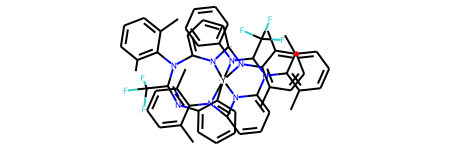

In [4]:
# draw the molecule with default drawer 
mol

In [5]:
# function to make the drawing look better 
def DrawMol(mol):
    
    # create mol object from smiles string
    mol = Chem.MolFromSmiles(mol)
    molSize=(450,150)
    mc = Chem.Mol(mol.ToBinary())
    
    if not mc.GetNumConformers():
        rdDepictor.Compute2DCoords(mc)
        
    drawer = rdMolDraw2D.MolDraw2DSVG(molSize[0],molSize[1])
    
    # draw the molcule
    drawer.DrawMolecule(mc)
    drawer.FinishDrawing()
    
    # get the SVG string
    svg = drawer.GetDrawingText()
    display(SVG(svg.replace('svg:','')))

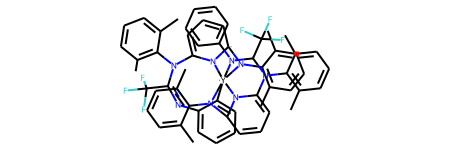

In [6]:
mol2 = '[Y]1234(N(c5c(cccc5C)C)[C]5C=CC=C(N15)N(c1c(cccc1C)C)C(=Nc1ccccc21)C(F)(F)F)N(c1c(cccc1C)C)[C]1C=CC=C(N31)N(c1c(cccc1C)C)[C](C(F)(F)F)N4c1ccccc1'
DrawMol(mol2)

# Descriptors for a single molecule 

In [7]:
# check molecular descriptors packages
dir(Chem.Descriptors)

['AUTOCORR2D_1',
 'AUTOCORR2D_10',
 'AUTOCORR2D_100',
 'AUTOCORR2D_101',
 'AUTOCORR2D_102',
 'AUTOCORR2D_103',
 'AUTOCORR2D_104',
 'AUTOCORR2D_105',
 'AUTOCORR2D_106',
 'AUTOCORR2D_107',
 'AUTOCORR2D_108',
 'AUTOCORR2D_109',
 'AUTOCORR2D_11',
 'AUTOCORR2D_110',
 'AUTOCORR2D_111',
 'AUTOCORR2D_112',
 'AUTOCORR2D_113',
 'AUTOCORR2D_114',
 'AUTOCORR2D_115',
 'AUTOCORR2D_116',
 'AUTOCORR2D_117',
 'AUTOCORR2D_118',
 'AUTOCORR2D_119',
 'AUTOCORR2D_12',
 'AUTOCORR2D_120',
 'AUTOCORR2D_121',
 'AUTOCORR2D_122',
 'AUTOCORR2D_123',
 'AUTOCORR2D_124',
 'AUTOCORR2D_125',
 'AUTOCORR2D_126',
 'AUTOCORR2D_127',
 'AUTOCORR2D_128',
 'AUTOCORR2D_129',
 'AUTOCORR2D_13',
 'AUTOCORR2D_130',
 'AUTOCORR2D_131',
 'AUTOCORR2D_132',
 'AUTOCORR2D_133',
 'AUTOCORR2D_134',
 'AUTOCORR2D_135',
 'AUTOCORR2D_136',
 'AUTOCORR2D_137',
 'AUTOCORR2D_138',
 'AUTOCORR2D_139',
 'AUTOCORR2D_14',
 'AUTOCORR2D_140',
 'AUTOCORR2D_141',
 'AUTOCORR2D_142',
 'AUTOCORR2D_143',
 'AUTOCORR2D_144',
 'AUTOCORR2D_145',
 'AUTOCORR2D_146',


In [8]:
# manual check for a single descriptor 
Chem.Descriptors.ExactMolWt(mol)

1062.319936252

In [9]:
# en mass
Exempt_list=[
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
'Chem',
'PropertyFunctor',
'_FingerprintDensity',
'_ChargeDescriptors',
'_descList',
'_du',
'_rdMolDescriptors',
'_runDoctests',
'_isCallable',
'_setupDescriptors',
'collections',
'descList',
'rdMolDescriptors',
'rdPartialCharges']
Descriptor_list = []
Descriptor_values = [] 
for item in dir(Chem.Descriptors):
    if (item in Exempt_list):
        next
    else:    
        Descriptor_list.append(item)
        desc_call = "Chem.Descriptors.{}(mol)".format(item)
        Descriptor_values.append(eval(desc_call))

TypeError: 'module' object is not callable

In [ ]:
print(Descriptor_values)

In [ ]:
print(Descriptor_list)
print(len(Descriptor_list))

# Import and Curate the Modeling endpoints

In [10]:
# location of CSV data for TM complexes
df_y = pandas.read_csv("tmQM_y.csv", ';')

C:\Users\adsnyder\anaconda3\envs\my-rdkit-env\lib\site-packages\IPython\core\interactiveshell.py:3457: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  exec(code_obj, self.user_global_ns, self.user_ns)


FileNotFoundError: [Errno 2] No such file or directory: 'tmQM_y.csv'

In [ ]:
# analyze the TM complex data
df_y.head()
df_y.describe()

 # Merge endpoints with molecular structure  

In [ ]:
# join CSD code IDs into a complete CSD code list
id1_list = df_X1[['CSD_Code']]
id1_list = id1_list.values.tolist()
id2_list = df_X2[['CSD_Code']]
id2_list = id2_list.values.tolist()
ID_List = mols[['CSD_Code']]
ID_List = np.asarray(ID_List)

In [ ]:
print(ID_List)

In [ ]:
# get the list of indcies that need to be dropped 

# record indicies of rows to drop
drop_idx = []
for i, r in df_y.iterrows():
    code = r['CSD_Code']
    if code not in ID_List:
        drop_idx.append(i)

In [ ]:
# analyze indicies of rows to drop
print(drop_idx)

In [ ]:
# drop unmatched indicies from dataframe
for i in drop_idx:
    df_y = df_y.drop([i])

In [ ]:
# compare shapes of curated endpoints and curated molecules
print("Properties:{},Molecules{}".format(df_y.shape, mols.shape))

In [ ]:
# merge curated endpoints with curated molecules
DataMatrix = pandas.merge(mols,df_y,on = ['CSD_Code','CSD_Code'])

In [ ]:
# analyze merged data
DataMatrix.head()
DataMatrix.describe()

In [ ]:
# rearrange matrix with endpoints on left after ID 
DataMatrix = DataMatrix[["CSD_Code","Electronic_E","Dispersion_E","Dipole_M","Metal_q","HL_Gap","HOMO_Energy","LUMO_Energy","Polarizability","SMILES","Stoichiometry","Charge","S","MND"]]

In [ ]:
# analyze rearranged matrix
DataMatrix.head()
DataMatrix.shape

In [ ]:
# save final data to CSV file for later analysis
DataMatrix.to_csv("MolMatrix.csv", sep = ';')